In [3]:
import json
data = []
for line in open("bench_results.json"):
    j = json.loads(line)
    name = ""
    if 'id' in j:
        print(j['id'])
        name = j['id'].split('/')[1]
        ns =  name.split('_') 
        tool = '_'.join(ns[1:])
        div = float(ns[0][1:])
    seq_len = 1000
    if 'typical' in j:
        microseconds = j['typical']['estimate']
        bases_per_nanosecond = seq_len/j['typical']['estimate']
        megabases_per_second = bases_per_nanosecond / 1000000 * 1000000000
        print(megabases_per_second)
        data += [(div,tool, megabases_per_second)]
    #print(json.dumps(j, indent=4))


BenchmarkGroup/d0.01_rust_bio_levenshtein/1000
0.7644591913805214
BenchmarkGroup/d0.01_parasailors/1000
2.1634975276874715
BenchmarkGroup/d0.01_rust_bio_simd_bounded_levenshtein/1000
100.73622688091274
BenchmarkGroup/d0.01_rust_bio_simd_levenshtein/1000
96.49312185728746
BenchmarkGroup/d0.01_block_aligner/1000
56.84131641105071
BenchmarkGroup/d0.01_wfa2/1000
166.88160110014007
BenchmarkGroup/d0.01_ksw2_extz/1000
0.43258584284963814
BenchmarkGroup/d0.01_ksw2_extz2_sse/1000
1.206591588486936
BenchmarkGroup/d0.01_scrooge/1000
106.3943409403191
BenchmarkGroup/d0.025_rust_bio_levenshtein/1000
0.7703173681169828
BenchmarkGroup/d0.025_parasailors/1000
2.1405164159231087
BenchmarkGroup/d0.025_rust_bio_simd_bounded_levenshtein/1000
95.98950948325727
BenchmarkGroup/d0.025_rust_bio_simd_levenshtein/1000
99.4751887577837
BenchmarkGroup/d0.025_block_aligner/1000
55.35220225705221
BenchmarkGroup/d0.025_wfa2/1000
39.6365093548895
BenchmarkGroup/d0.025_ksw2_extz/1000
0.4344770665625187
BenchmarkGroup/

[(0.01, 'rust_bio_levenshtein', 0.7644591913805214), (0.01, 'parasailors', 2.1634975276874715), (0.01, 'rust_bio_simd_bounded_levenshtein', 100.73622688091274), (0.01, 'rust_bio_simd_levenshtein', 96.49312185728746), (0.01, 'block_aligner', 56.84131641105071), (0.01, 'wfa2', 166.88160110014007), (0.01, 'ksw2_extz', 0.43258584284963814), (0.01, 'ksw2_extz2_sse', 1.206591588486936), (0.01, 'scrooge', 106.3943409403191), (0.025, 'rust_bio_levenshtein', 0.7703173681169828), (0.025, 'parasailors', 2.1405164159231087), (0.025, 'rust_bio_simd_bounded_levenshtein', 95.98950948325727), (0.025, 'rust_bio_simd_levenshtein', 99.4751887577837), (0.025, 'block_aligner', 55.35220225705221), (0.025, 'wfa2', 39.6365093548895), (0.025, 'ksw2_extz', 0.4344770665625187), (0.025, 'ksw2_extz2_sse', 1.2247156000661972), (0.025, 'scrooge', 68.81369883357374), (0.05, 'rust_bio_levenshtein', 0.7588470868304072), (0.05, 'parasailors', 2.3448450854491076), (0.05, 'rust_bio_simd_bounded_levenshtein', 67.5864261814

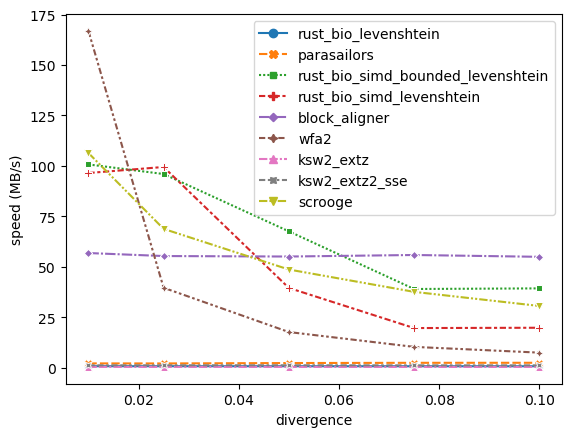

In [4]:
print(data)
import seaborn, pandas
df = pandas.DataFrame(data=data, columns=['divergence', 'tool', 'speed (MB/s)'])
plot = seaborn.lineplot(data=df, x="divergence", y="speed (MB/s)", style="tool", hue="tool",  markers=True)
plot.legend_.set_title(None)
fig = plot.get_figure()
fig.savefig("out.png",dpi=300) 